### Classify Movie Review Using RNN
- Binary Classification on IMDB Dataset
- I/P : 50,000 Reviews
- O/P : Positive or Negative

In [0]:
from keras.datasets import imdb
import numpy as np

### Dataset Preparation

In [0]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [214]:
print(XT.shape,Xt.shape)

(25000,) (25000,)


In [215]:
print(XT[0])
print(len(XT[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [0]:
word_idx = imdb.get_word_index()

In [0]:
print(word_idx.items())

In [0]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [0]:
print(idx_word.items())

In [220]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi


### Create a 2D Tensor
- To feed it to the embedding layer

In [0]:
from keras.preprocessing import sequence

In [0]:
X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

In [223]:
print(X_train.shape)
print(X_test.shape)

(25000, 500)
(25000, 500)


### Defining the Model Architecture

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,SimpleRNN

In [0]:
model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

In [0]:
# Compile the models
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [227]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 32)                3104      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [228]:
from keras.callbacks import ModelCheckpoint # save the best model, to control overfiitting
from keras.callbacks import EarlyStopping # save time

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
earlystop = EarlyStopping(monitor='val_acc',patience=1)
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.5756 - acc: 0.6944 - val_loss: 0.4869 - val_acc: 0.7682
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3501 - acc: 0.8569 - val_loss: 0.4040 - val_acc: 0.8186
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2594 - acc: 0.9004 - val_loss: 0.3541 - val_acc: 0.8508
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1800 - acc: 0.9338 - val_loss: 0.4544 - val_acc: 0.7920


### Visualizing the Results

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [0]:
h = hist.history
epochs = range(1,len(h['loss'])+1)

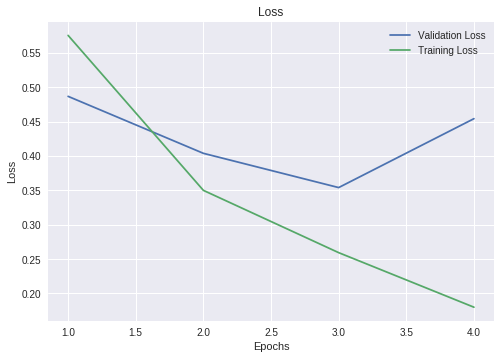

In [231]:
plt.plot(epochs,h['val_loss'],label='Validation Loss')
plt.plot(epochs,h['loss'],label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

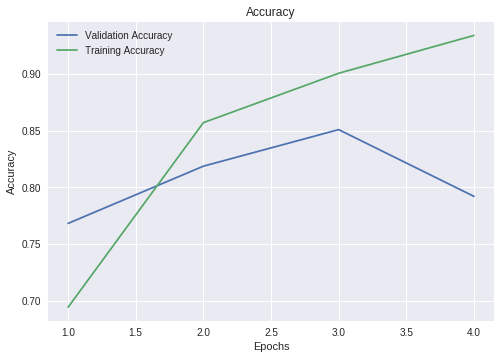

In [232]:
plt.plot(epochs,h['val_acc'],label='Validation Accuracy')
plt.plot(epochs,h['acc'],label='Training Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Using the saved Model

In [233]:
!ls

best_model.h5  sample_data


In [0]:
model.load_weights('best_model.h5')

In [235]:
model.evaluate(X_test,Yt)

25000/25000 [==============================] - 21s 851us/step


[0.3522878290081024, 0.8538]

In [236]:
model.evaluate(X_train,YT)

25000/25000 [==============================] - 21s 852us/step


[0.20510441564559936, 0.92936]